In [24]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('/content/placement.csv')

In [50]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [27]:
df.shape

(100, 4)

In [52]:
df = df.iloc[:,1:]

In [53]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [31]:
import matplotlib.pyplot as plt


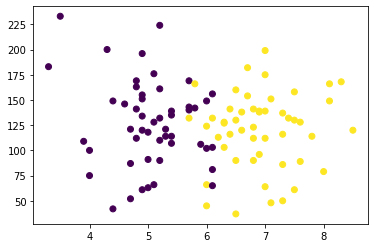

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [54]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [55]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [56]:
y.shape

(100,)

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [79]:
X_train

,cgpa,iq
80,4.9,196.0
52,7.0,175.0
12,5.4,139.0
50,3.5,233.0
69,8.5,120.0
...,...,...
14,6.1,103.0
81,5.4,107.0
60,6.9,139.0
82,6.5,37.0


In [80]:
y_train

80    0
52    1
12    0
50    0
69    1
     ..
14    0
81    0
60    1
82    1
59    0
Name: placement, Length: 90, dtype: int64

In [81]:
X_test

,cgpa,iq
67,5.0,118.0
53,8.3,168.0
29,7.0,112.0
55,7.8,114.0
92,5.2,110.0
65,8.1,166.0
27,6.0,124.0
39,4.6,146.0
51,4.8,141.0
93,6.8,112.0


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_train

array([[-0.95129702,  1.77821321],
       [ 0.95129702,  1.26845696],
       [-0.49829844,  0.3945891 ],
       [-2.21969305,  2.67635518],
       [ 2.31029277, -0.06661894],
       [-1.49489532,  1.87530964],
       [-1.13249646, -1.71725823],
       [ 1.22309617, -0.16371537],
       [ 0.58889816, -0.06661894],
       [-0.49829844,  0.29749267],
       [ 1.22309617,  0.34604088],
       [-0.13589957,  0.46741142],
       [ 0.86069731,  0.37031499],
       [-0.22649929,  0.41886321],
       [ 0.31709901,  0.12757392],
       [ 0.31709901,  0.10329981],
       [-2.40089249,  1.46264982],
       [ 0.04529986, -1.88717698],
       [-1.04189674,  1.12281232],
       [-0.67949787,  0.22467035],
       [ 1.04189674, -1.81435466],
       [ 0.49829844,  0.17612213],
       [-0.58889816, -0.21226358],
       [ 1.22309617, -1.76580645],
       [-0.77009759,  0.12757392],
       [-0.95129702, -0.06661894],
       [ 0.22649929, -0.23653769],
       [-0.95129702, -1.49879127],
       [-0.67949787,

In [86]:
X_test = scaler.transform(X_test)

In [87]:
X_test

array([[-0.86069731, -0.11516715],
       [ 2.12909334,  1.09853821],
       [ 0.95129702, -0.2608118 ],
       [ 1.67609476, -0.21226358],
       [-0.67949787, -0.30936001],
       [ 1.94789391,  1.04998999],
       [ 0.04529986,  0.03047749],
       [-1.22309617,  0.56450785],
       [-1.04189674,  0.44313731],
       [ 0.77009759, -0.2608118 ]])

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf = LogisticRegression()

In [90]:
# model training
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = clf.predict(X_test)

In [92]:
y_test

67    0
53    1
29    1
55    1
92    0
65    1
27    1
39    0
51    0
93    1
Name: placement, dtype: int64

In [93]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred)

0.9

In [101]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


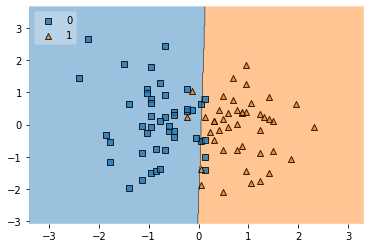

In [102]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [103]:
import pickle

In [104]:
pickle.dump(clf,open('model.pkl','wb'))